# Customer Segmentation for a Retail Store (using K-Means Clustering)

## Business Objective
The goal is to identify customer segments in a retail mall based on demographic and spending behavior to inform targeted marketing and improve customer engagement.


## Data loading and preprocessing

In [5]:
#load the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# Explore data
print(df.info())
print(df.describe())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Select numerical features and scale them
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## 2. Elbow Method to Determine Optimal k

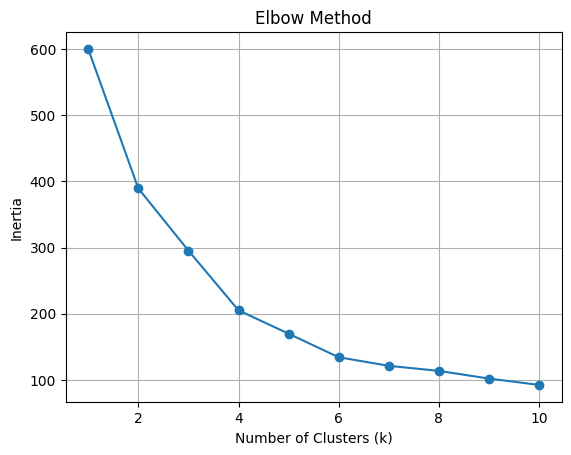

In [4]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Interpretation:

The elbow method graph shows the **inertia** (i.e., within-cluster sum of squares) as the number of clusters `k` increases from 1 to 10.

* Inertia decreases as `k` increases because more clusters reduce the average distance between points and their assigned cluster centroids.
* However, after a certain point, the reduction in inertia diminishes — indicating **diminishing returns** from adding more clusters.

### Elbow Point:

In this plot, the **"elbow" appears at `k = 5`** — the point where the curve starts to flatten. This suggests that **5 clusters** is a good balance between model complexity and cluster cohesion.

### Conclusion:

* Choosing **k = 5** is appropriate as it captures distinct customer segments while avoiding overfitting.
* Beyond `k = 5`, the gain in clustering quality (inertia reduction) is minimal, so additional clusters may not provide meaningful segmentation improvements.

## 3. Silhouette Scores

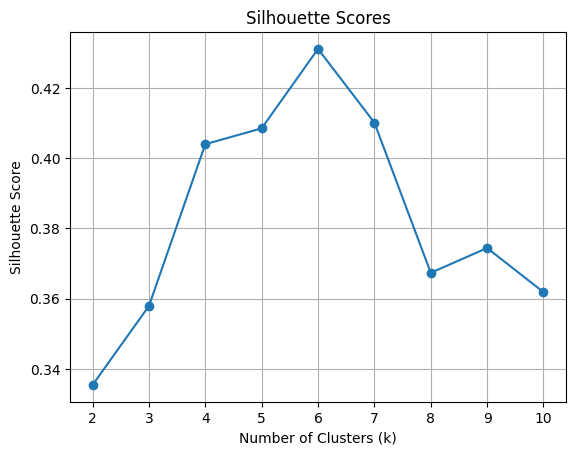

In [6]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### Interpretation:

The silhouette score measures how similar each point is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

* In the plot, silhouette scores are calculated for `k = 2` to `k = 10`.
* The **highest silhouette score is at `k = 6`**, indicating that this number of clusters provides the most well-separated and cohesive clusters.

### Conclusion:

* **k = 6** achieves the best cluster separation and internal cohesion, as suggested by the peak in silhouette score (\~0.43).
* Although the elbow method suggests `k = 5`, the silhouette plot indicates that `k = 6` might produce more **distinct and interpretable segments**.
* In practice, you might evaluate both options (`k = 5` and `k = 6`) for interpretability and business usefulness.

## 4. Final Model and Visualization

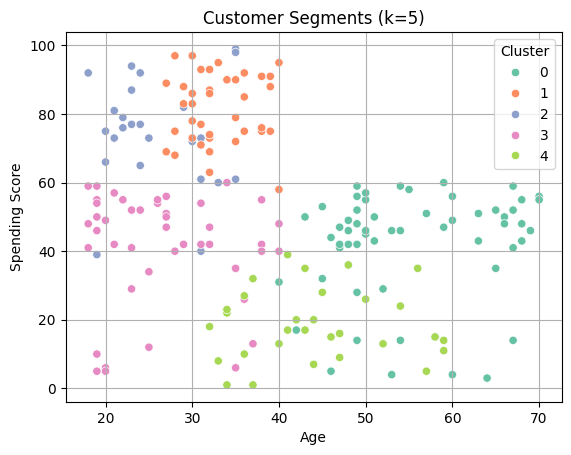

In [7]:
# Fit final model with optimal k (chosen as 5)
optimal_k = 5
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(scaled_features)

plt.figure()
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments (k=5)')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

### Cluster Visualization (k = 5) – Interpretation

The scatter plot shows customer segments based on **Age** and **Spending Score** using **K-Means clustering with 5 clusters**.

---

#### **Cluster 0 (Green)**

* **Older customers** with **moderate to low spending scores**.
* Likely cautious spenders.
* **Strategy**: Promote value-based bundles or essential items.

#### **Cluster 1 (Orange)**

* **Young to middle-aged** customers with **very high spending scores**.
* Likely premium, brand-conscious shoppers.
* **Strategy**: Target with high-end, exclusive offers.

#### **Cluster 2 (Blue)**

* **Young customers** with **high spending scores**, slightly more diverse than Cluster 1.
* Impulsive or trend-following shoppers.
* **Strategy**: Attract with influencer campaigns and limited-time deals.

#### **Cluster 3 (Pink)**

* **Young to middle-aged** with **moderate spending scores**.
* Balanced group — not extreme in either income or spending.
* **Strategy**: Encourage upselling and loyalty programs.

#### **Cluster 4 (Light Green)**

* **Middle-aged customers** with **low spending scores**.
* Under-engaged or price-sensitive segment.
* **Strategy**: Retention campaigns, re-engagement incentives.

---

### Summary:

* The segmentation reveals clear behavioral differences.


## 5. Interpretation & Business Action

In [8]:
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


### Insights:
- **Cluster 1**: Young high spenders with high income → Target with luxury promotions.
- **Cluster 4**: Middle-aged, high income but low spenders → Re-engage with loyalty rewards or exclusive perks.
- **Cluster 2**: Younger middle-income high spenders → Offer trendy, cost-effective products.
- **Cluster 0**: Older average earners with balanced spending → Upsell value packs or essential products.
- **Cluster 3**: Older, low-income, low spenders → Focus on retention strategies or basic necessity offers.

### Potential Business Actions:
1. Launch age- and income-specific campaigns tailored for high-value clusters.
2. Identify and retain under-engaged customers with targeted incentives or offers.